Aidan Burns and Lauren Flanagan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



df = pd.read_csv('data.csv', header=None)
df.shape

(10000, 785)

1.)
Notice that the labels are in the first column (at 0th column in a Pandas dataframe). The rest of the columns are representing features.
Separate your X and y accordingly.

In [2]:
df_y = df[0]
df_x = df.drop(0, axis=1)
df_y.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

2.)
Randomly choose 20% of the samples as your test set and the remaining samples as your training set.

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=23)

3.)
Now pick any sample from your training set. Reshape it into a (28, 28) array. Research “imshow” for Python.
Then visualize the sample using imshow. It should look like one of the 10 digits.

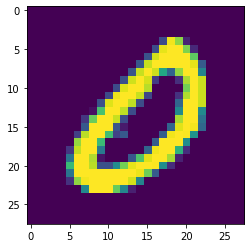

In [4]:
npArray = np.reshape(x_train.sample(1).to_numpy(),(28,28))
plt.imshow(npArray)

4.)
Run the following algorithms on the dataset and report your test accuracy
a. Logistic Regression
b. KNN
c. One algorithm of your choice (suggestions: Random Forest, Support Vector Machine etc.).
Any algorithm that can perform classification tasks will be accepted.

In [5]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=3000).fit(x_train,y_train)
predictions = logmodel.predict(x_test)

score = logmodel.score(x_test, y_test)
print(score)
scores = []
scores.append(score)


0.873


C:\Users\sciab\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores_list = []
knn = KNeighborsClassifier(n_neighbors=1)
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    predictions = knn.predict(x_test)
    scores_list.append(metrics.accuracy_score(y_test, predictions))
print(scores_list)


[0.9515, 0.9355, 0.9525, 0.9505, 0.9495, 0.951, 0.9485, 0.95, 0.9495, 0.9465, 0.9475, 0.9485, 0.945, 0.944, 0.945, 0.943, 0.9455, 0.943, 0.9435, 0.9425, 0.9415, 0.9405, 0.9395, 0.9385, 0.937, 0.9365, 0.9365, 0.9345, 0.9355]


In [7]:
scores.append(max(scores_list))

In [8]:
#I am doing a decision tree

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X=x_train, y=y_train)
predictions = tree_model.predict(x_test)

score = tree_model.score(x_test, y_test)
print(score)
scores.append(score)

0.805


5.)
Show the performance of the three algorithms using a visualization method of your choice (e.g. column charts).

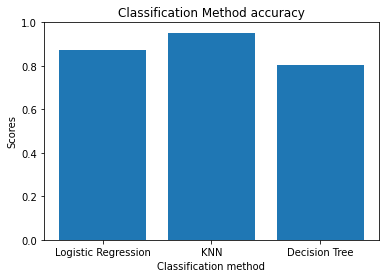

In [9]:
plt.bar(["Logistic Regression", "KNN", "Decision Tree"],scores)
plt.title('Classification Method accuracy')
plt.xlabel('Classification method')
plt.ylabel('Scores')
plt.show()